In [762]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick

sns.set_style("whitegrid")
sns.set_palette("Paired")

In [763]:
clean = pd.read_csv('b4dummies.csv', usecols=['utgdag', 'postnr', 'sveitarfelag', 'kaupverd', 'fasteignamat',
       'byggar', 'einflm', 'lod_flm', 'tegund', 'fullbuid'], parse_dates=True, index_col='utgdag') 
df = pd.read_csv('fjolbyli_all_variables_MEAN.csv')
macros = pd.read_csv('fjolbyli_all_variables_MEAN.csv', usecols=('date', 'fjöldi_kaupsamninga',
       'auglyst_fjolbyli', 'solutimi', 'Verðtryggð lán', 'erlend_lan',
       'Óverðtryggð lán', 'overdtryggt', 'verdtryggt', 'visitala_rvk_%',
       'verdbolga_%'), parse_dates=True, index_col=0)
fjol = pd.read_csv('fjolbyli_CLEAN.csv')

In [764]:
byg_ser = pd.read_csv('byggd_serbyli.csv', sep=';', index_col=0)
byg_fjol = pd.read_csv('byggd_fjolbyli.csv', sep=';', index_col=0)
stada = pd.read_csv('stada_rvk.csv', index_col=0)
byggt = pd.read_csv('byggdar_ibudir.csv', sep=';',header=None)
mann = pd.read_csv('mannfjoldi_sveita.csv', index_col=0).T

In [765]:
mann = mann[['Reykjavík', 'Kópavogur', 'Garðabær', 'Hafnarfjörður',
       'Mosfellsbær']]
mann.index.names = ['date'] 

In [766]:
byg_ser = byg_ser[1:] 
byg_fjol = byg_fjol[1:]
ibudir = byg_ser + byg_fjol
ibudir.columns = mann.columns
ibudir.index.names = ['date']

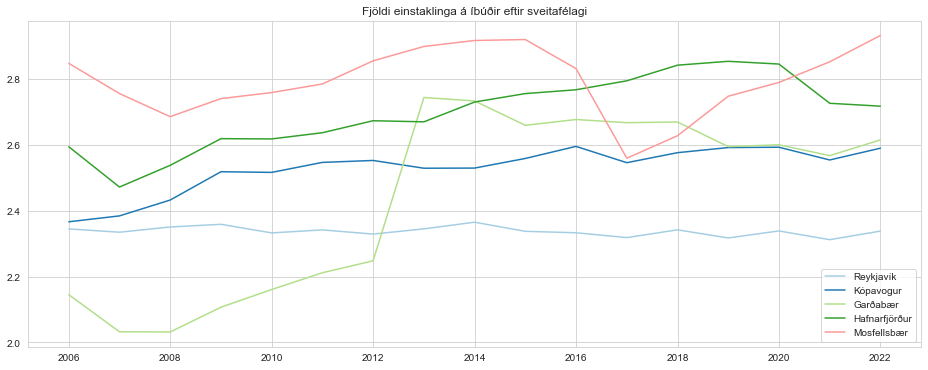

In [767]:
test = mann.values / ibudir.values
test = pd.DataFrame(test, columns=mann.columns, index=mann.index)
test.index = pd.to_datetime(test.index)
plt.figure(figsize=(16,6))
plt.plot(test)
plt.title('Fjöldi einstaklinga á íbúðir eftir sveitafélagi')
plt.legend(test.columns)
plt.show()

In [768]:
clean['tegund'].unique()
clean.index = clean.index + pd.offsets.MonthBegin(0)

In [769]:
clean.head()

,postnr,sveitarfelag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid
utgdag,,,,,,,,,
2006-03-01,161.0,Reykjavíkurborg,11050,17330,1958,224.0,7000.0,Serbyli,1
2006-04-01,112.0,Reykjavíkurborg,24700,19820,1988,112.3,1285.0,Fjolbyli,1
2006-04-01,221.0,Hafnarfjarðarkaupstaður,65000,43800,2003,290.7,632.8,Serbyli,1
2006-05-01,111.0,Reykjavíkurborg,11900,12090,1972,78.1,7940.0,Fjolbyli,1
2006-05-01,112.0,Reykjavíkurborg,17300,15110,1993,89.0,1339.0,Fjolbyli,1


In [770]:
cleanA = clean[clean['sveitarfelag'] == 'Reykjavíkurborg']
cleanA = cleanA.iloc[-200:]
cleanA

,postnr,sveitarfelag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid
utgdag,,,,,,,,,
2022-05-01,101.0,Reykjavíkurborg,73300,62500,2008,83.6,6989.0,Fjolbyli,1
2022-05-01,101.0,Reykjavíkurborg,58900,45950,1935,76.7,254.0,Fjolbyli,1
2022-05-01,110.0,Reykjavíkurborg,47000,38050,1991,62.3,3232.0,Fjolbyli,1
2022-05-01,101.0,Reykjavíkurborg,58000,40250,1931,74.5,226.1,Fjolbyli,1
2022-05-01,101.0,Reykjavíkurborg,98700,71700,2021,122.2,1533.0,Fjolbyli,1
...,...,...,...,...,...,...,...,...,...
2022-05-01,109.0,Reykjavíkurborg,125000,97950,1982,338.6,1698.0,Serbyli,1
2022-05-01,113.0,Reykjavíkurborg,85500,53250,2003,139.1,2597.0,Fjolbyli,1
2022-05-01,101.0,Reykjavíkurborg,27000,24200,1937,34.5,399.8,Fjolbyli,1


In [771]:
lastrows = -1000

cleanA = clean[clean['sveitarfelag'] == 'Reykjavíkurborg']
cleanA = clean[clean['postnr'].isin([101, 104, 105, 107])]
cleanA = cleanA.iloc[lastrows:]
cleanA['teg']=pd.Categorical(cleanA['tegund'])

cleanB = clean[clean['sveitarfelag'] == 'Kópavogsbær']
cleanB = clean[clean['postnr'].isin([200, 201, 203])]
cleanB = cleanB.iloc[lastrows:]
cleanB['teg']=pd.Categorical(cleanB['tegund'])

cleanC = clean[clean['sveitarfelag'] == 'Garðabær']
cleanC = clean[clean['postnr'].isin([210, 221, 225])]
cleanC = cleanC.iloc[lastrows:]
cleanC['teg']=pd.Categorical(cleanC['tegund'])

cleanD = clean[clean['sveitarfelag'] == 'Hafnarfjarðarkaupstaður']
cleanD = clean[clean['postnr'].isin([220])]
cleanD = cleanD.iloc[lastrows:]
cleanD['teg']=pd.Categorical(cleanD['tegund'])

In [772]:
postnumer

['Fjolbyli', 'Serbyli', 'Atvinnuhusnaedi']

C:\Users\halld\AppData\Local\Temp\ipykernel_24540\1150603540.py:49: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax4.legend(*scatt.legend_elements(), loc="upper left", labels=cD, title="Classes1")


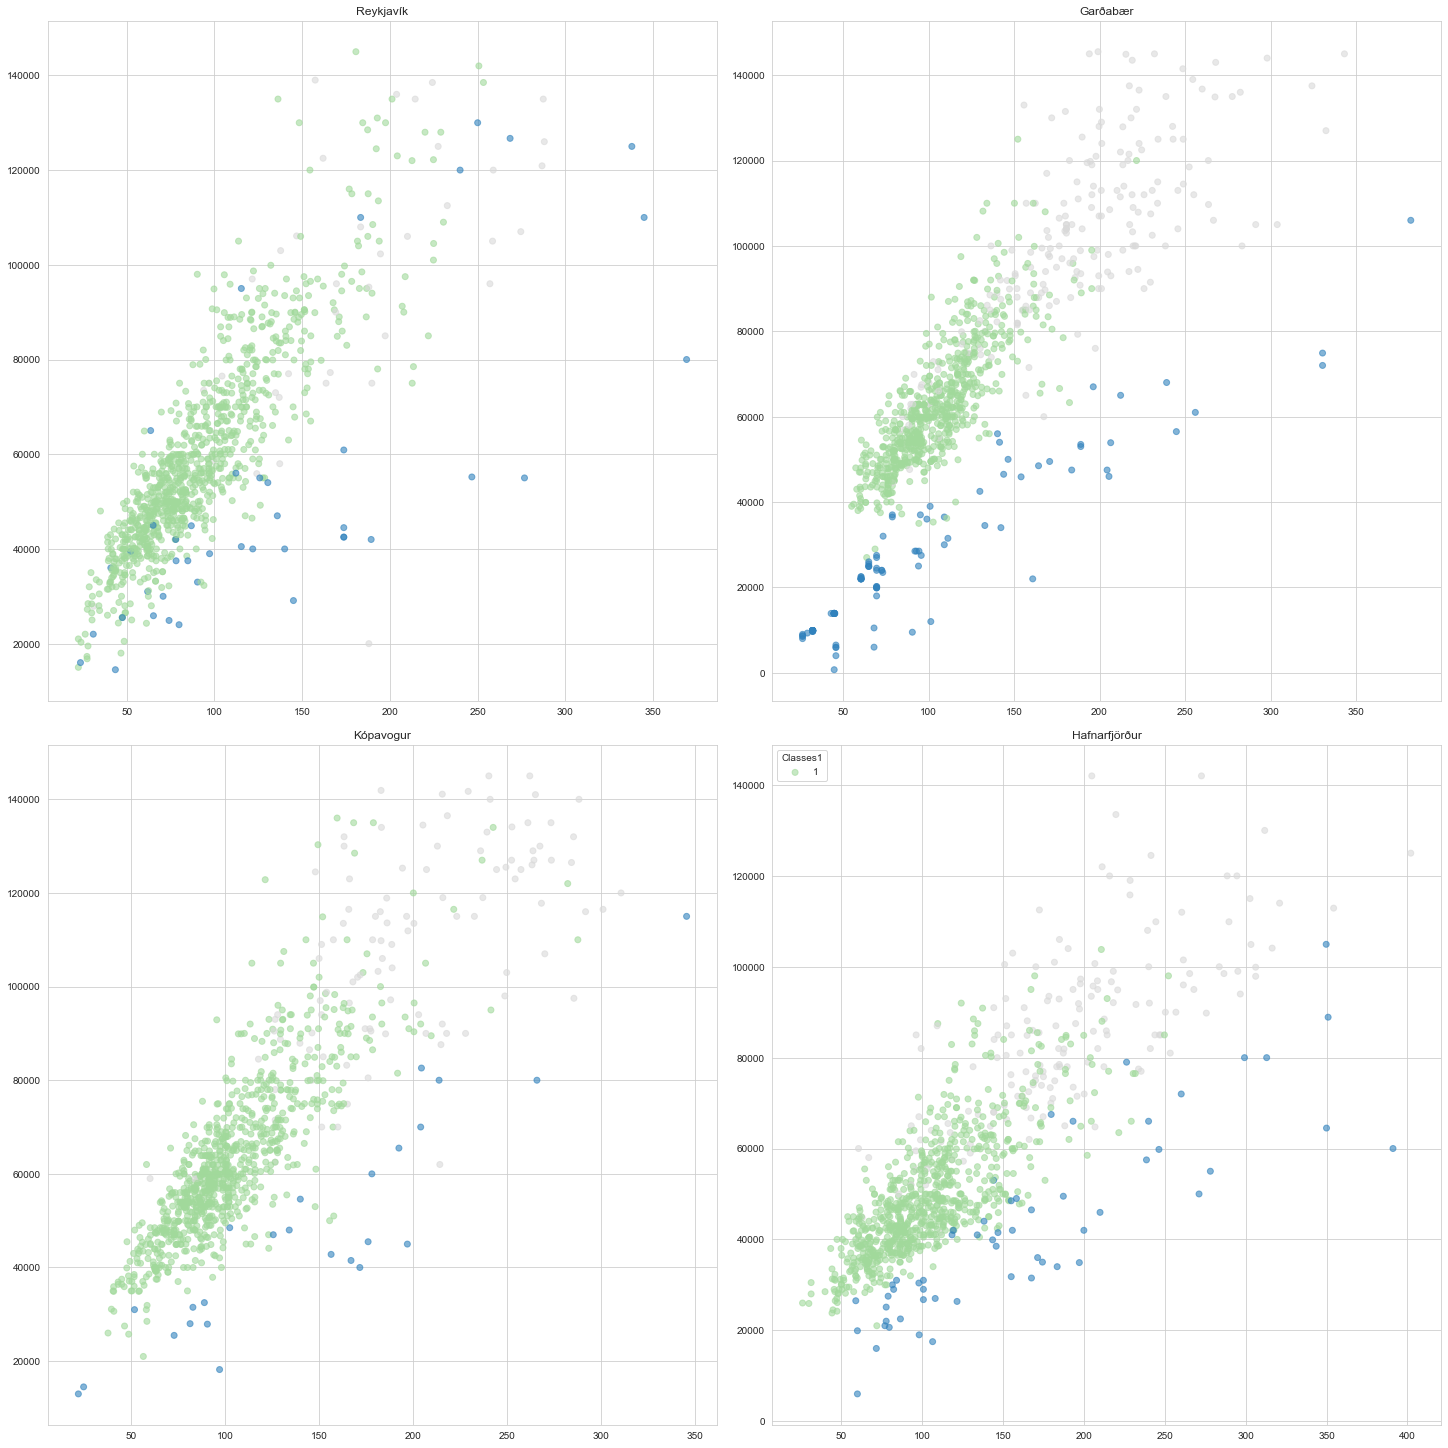

In [773]:
x = cleanA['einflm']
y = cleanA['kaupverd']
c = cleanA['tegund'].astype('category').cat.codes
s = cleanA['byggar']
postnumer = cleanA['tegund'].unique().tolist()

xB = cleanB['einflm']
yB = cleanB['kaupverd']
cB = cleanB['tegund'].astype('category').cat.codes
sB = cleanB['byggar']
postnumerB = cleanB['tegund'].unique().tolist()

xC = cleanC['einflm']
yC = cleanC['kaupverd']
cC = cleanC['tegund'].astype('category').cat.codes
sC = cleanC['byggar']
postnumerC = cleanC['tegund'].unique().tolist()

xD = cleanD['einflm']
yD = cleanD['kaupverd']
cD = cleanD['tegund'].astype('category').cat.codes
sD = cleanD['byggar']
postnumerD = cleanD['tegund'].unique().tolist()

fig = plt.figure(constrained_layout=True, figsize=(20,20))
gs = gridspec.GridSpec(2, 2, figure=fig)
ax = fig.add_subplot(gs[0, 0])

ax.scatter(x, y, c=c, #s=s/100,
                      cmap="tab20c", alpha=0.6)
plt.title('Reykjavík')

ax2 = fig.add_subplot(gs[1,0])
ax2.scatter(xB, yB, c=cB, #s=sB/100,
                      cmap="tab20c", alpha=0.6)
plt.title('Kópavogur')

ax3 = fig.add_subplot(gs[0,1])
ax3.scatter(xC, yC, c=cC, #s=sC/100,
                      cmap="tab20c", alpha=0.6)
plt.title('Garðabær')

ax4 = fig.add_subplot(gs[1,1])
scatt = ax4.scatter(xD, yD, c=cD, #s=D/100,
                      cmap="tab20c", alpha=0.6)
#fjolb = ax4.scatter(xD, yD, marker='x', color='b')
#serb = ax4.scatter(xD, yD, marker='x', color='g')
#atv  = ax4.scatter(xD, yD, marker='x', color='b')
ax4.legend(*scatt.legend_elements(), loc="upper left", labels=cD, title="Classes1")
plt.title('Hafnarfjörður')

plt.show()

In [774]:
ekki_atv = clean[clean['tegund'] != 'Atvinnuhusnaedi']
ekki_atv = ekki_atv[ekki_atv['sveitarfelag'] != 'Kjósarhreppur']
ekki_atv = ekki_atv[ekki_atv['sveitarfelag'] != 'Seltjarnarnesbær']
ekki_atv.head()

,postnr,sveitarfelag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid
utgdag,,,,,,,,,
2006-03-01,161.0,Reykjavíkurborg,11050,17330,1958,224.0,7000.0,Serbyli,1
2006-04-01,112.0,Reykjavíkurborg,24700,19820,1988,112.3,1285.0,Fjolbyli,1
2006-04-01,221.0,Hafnarfjarðarkaupstaður,65000,43800,2003,290.7,632.8,Serbyli,1
2006-05-01,111.0,Reykjavíkurborg,11900,12090,1972,78.1,7940.0,Fjolbyli,1
2006-05-01,112.0,Reykjavíkurborg,17300,15110,1993,89.0,1339.0,Fjolbyli,1


In [775]:
ekki_atv['sveitarfelag'].unique()

array(['Reykjavíkurborg', 'Hafnarfjarðarkaupstaður', 'Kópavogsbær',
       'Garðabær', 'Mosfellsbær'], dtype=object)

In [776]:
magn = ekki_atv[['postnr', 'sveitarfelag', 'tegund', 'fullbuid']]
magn = magn.groupby(['utgdag','sveitarfelag', 'tegund']) ['fullbuid'].sum()
magn = magn.reset_index()
magn.head()

,utgdag,sveitarfelag,tegund,fullbuid
0,2006-03-01,Reykjavíkurborg,Serbyli,1
1,2006-04-01,Hafnarfjarðarkaupstaður,Serbyli,1
2,2006-04-01,Reykjavíkurborg,Fjolbyli,1
3,2006-05-01,Kópavogsbær,Fjolbyli,1
4,2006-05-01,Reykjavíkurborg,Fjolbyli,4


In [777]:
magn['year'] = pd.DatetimeIndex(magn['utgdag']).year

In [778]:
magn_ar = magn.groupby(['year','sveitarfelag', 'tegund'])['fullbuid'].sum()
magn_ar = magn_ar.reset_index()
kaup_ser = magn_ar[magn_ar['tegund']=='Serbyli']
kaup_fjol = magn_ar[magn_ar['tegund']=='Fjolbyli']
magn_ar.head()

,year,sveitarfelag,tegund,fullbuid
0,2006,Garðabær,Fjolbyli,54
1,2006,Garðabær,Serbyli,41
2,2006,Hafnarfjarðarkaupstaður,Fjolbyli,299
3,2006,Hafnarfjarðarkaupstaður,Serbyli,41
4,2006,Kópavogsbær,Fjolbyli,330


In [779]:
kaup_fjol = kaup_fjol.set_index(['year', 'sveitarfelag', 'tegund']).unstack(['sveitarfelag'])
kaup_ser = kaup_ser.set_index(['year', 'sveitarfelag', 'tegund']).unstack(['sveitarfelag'])
kaup_fjol.columns = kaup_fjol.columns.droplevel(0)
kaup_fjol.head()

,sveitarfelag,Garðabær,Hafnarfjarðarkaupstaður,Kópavogsbær,Mosfellsbær,Reykjavíkurborg
year,tegund,,,,,
2006,Fjolbyli,54,299,330,39,1344
2007,Fjolbyli,264,886,1069,149,3837
2008,Fjolbyli,61,253,338,51,1244
2009,Fjolbyli,51,52,141,15,432
2010,Fjolbyli,95,113,246,23,849


In [780]:
kaup_fjol = kaup_fjol.reset_index()
#kaup_fjol.drop(['sveitarfelag', 'tegund'],axis=1)
#kaup_fjol.set_index('year',inplace=True)
kaup_fjol.head()

sveitarfelag,year,tegund,Garðabær,Hafnarfjarðarkaupstaður,Kópavogsbær,Mosfellsbær,Reykjavíkurborg
0,2006,Fjolbyli,54,299,330,39,1344
1,2007,Fjolbyli,264,886,1069,149,3837
2,2008,Fjolbyli,61,253,338,51,1244
3,2009,Fjolbyli,51,52,141,15,432
4,2010,Fjolbyli,95,113,246,23,849


In [797]:
kaup_fjol.columns

Index(['year', 'tegund', 'Garðabær', 'Hafnarfjarðarkaupstaður', 'Kópavogsbær',
       'Mosfellsbær', 'Reykjavíkurborg'],
      dtype='object', name='sveitarfelag')

Text(0.5, 1.0, 'Sérbýli, kaupsamningar')

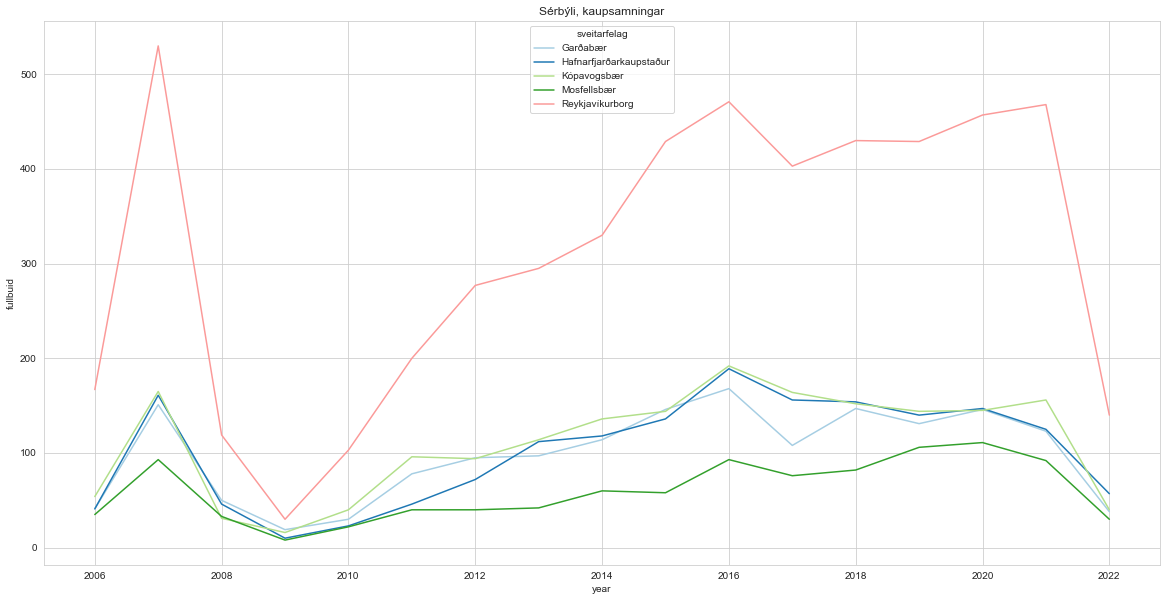

In [782]:
plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='fullbuid', hue='sveitarfelag', data=magn_ar[magn_ar['tegund']=='Serbyli'])
plt.title('Sérbýli, kaupsamningar')

Text(0.5, 1.0, 'Fjölbýli, kaupsamningar')

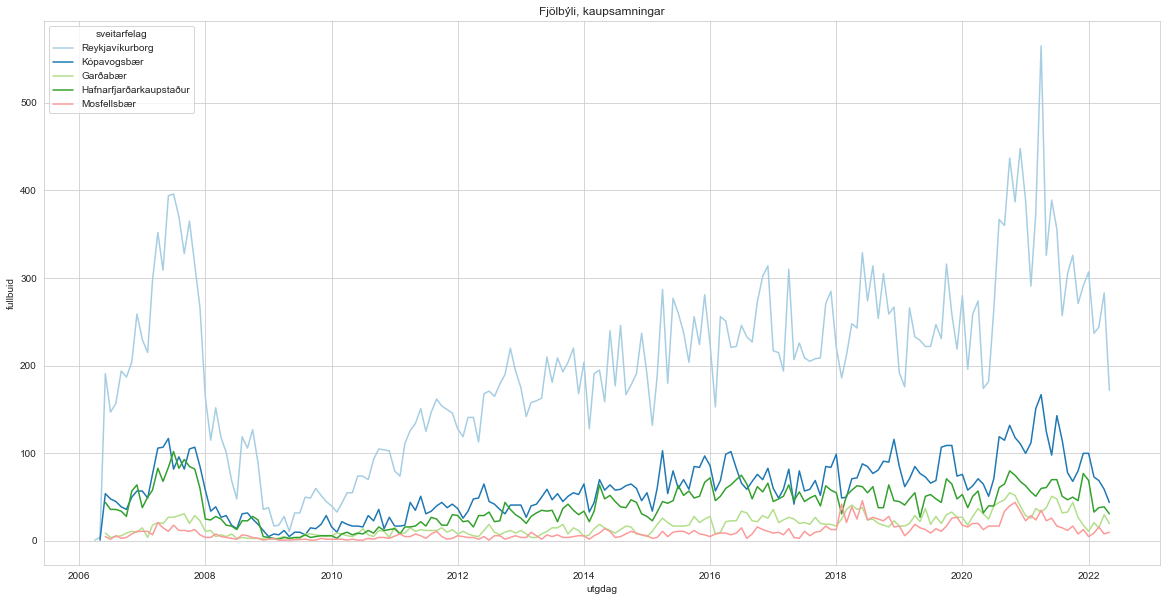

In [783]:
plt.figure(figsize=(20,10))
sns.lineplot(x='utgdag', y='fullbuid', hue='sveitarfelag', data=magn[magn['tegund']=='Fjolbyli'])
plt.title('Fjölbýli, kaupsamningar')

In [784]:
fjol.drop('Unnamed: 0', axis=1, inplace=True)
fjol.set_index('utgdag', inplace=True)
fjol.head()

,kaupverd,fasteignamat,byggar,einflm,lod_flm,fullbuid,postnr_101.0,postnr_102.0,postnr_103.0,postnr_104.0,...,postnr_203.0,postnr_206.0,postnr_220.0,postnr_221.0,postnr_270.0,postnr_271.0,sveitarfelag_Hafnarfjarðarkaupstaður,sveitarfelag_Kópavogsbær,sveitarfelag_Mosfellsbær,sveitarfelag_Reykjavíkurborg
utgdag,,,,,,,,,,,,,,,,,,,,,
2006-04-01,24700,19820,1988,112.3,1285.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2006-05-01,11900,12090,1972,78.1,7940.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2006-05-01,17300,15110,1993,89.0,1339.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2006-05-01,19200,14725,1956,88.3,6106.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2006-05-01,18100,15940,1907,90.3,204.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [785]:
bad_idx = macros.index[macros['auglyst_fjolbyli'].pct_change().abs().ge(0.5)]
bad_idx

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01'], dtype='datetime64[ns]', name='date', freq=None)

In [786]:
 macros.loc[(macros.index >= bad_idx.min()) & (macros.index < bad_idx.max()), 'auglyst_fjolbyli'] = np.nan
 macros['auglyst_fjolbyli'] = macros['auglyst_fjolbyli'].interpolate()
 

In [787]:
macros[['auglyst_fjolbyli']].iloc[152:157]

,auglyst_fjolbyli
date,
2018-12-01,0.66
2019-01-01,0.76
2019-02-01,0.86
2019-03-01,0.96
2019-04-01,1.06


In [788]:
macros['verdtryggt_vigt'] = macros['Verðtryggð lán'] * macros['verdtryggt']
macros['overdtryggt_vigt'] = macros['Óverðtryggð lán'] * macros['overdtryggt']
macros['auglyst_fjolbyli'] = macros['auglyst_fjolbyli'] * 1000
macros.head()

,fjöldi_kaupsamninga,auglyst_fjolbyli,solutimi,Verðtryggð lán,erlend_lan,Óverðtryggð lán,overdtryggt,verdtryggt,visitala_rvk_%,verdbolga_%,verdtryggt_vigt,overdtryggt_vigt
date,,,,,,,,,,,,
2006-04-01,598.40,2050.0,6.21,87.42,7.19,4.07,12.5,4.30,1.2,1.070205,375.906,50.875
2006-05-01,617.00,2050.0,6.21,87.31,7.36,4.01,13.0,4.60,-0.2,1.482423,401.626,52.130
2006-06-01,472.74,2050.0,6.21,87.20,7.53,3.95,14.0,4.60,0.6,1.001669,401.120,55.300
2006-07-01,436.96,2050.0,6.21,87.09,7.70,3.89,14.0,4.60,-1.7,0.413223,400.614,54.460
2006-08-01,406.92,2050.0,6.21,86.98,7.87,3.83,14.5,4.85,2.4,0.288066,421.853,55.535


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Sölutími í mánuðum')

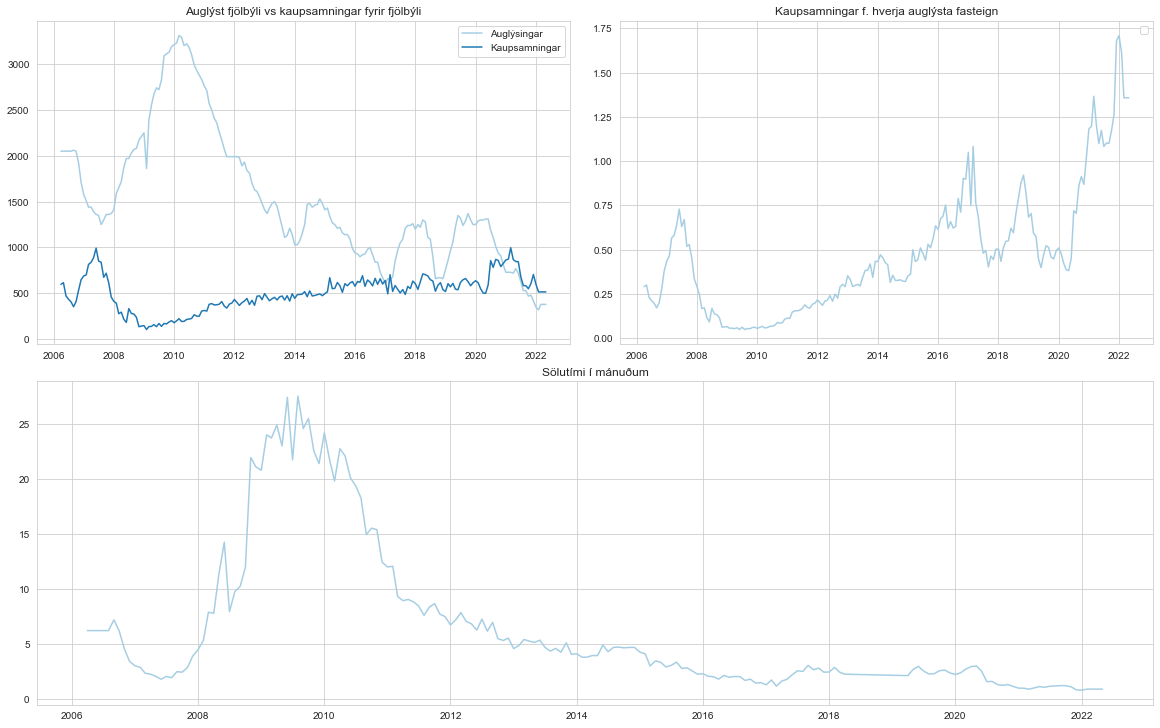

In [789]:
fig = plt.figure(constrained_layout=True, figsize=(16,10))
gs = gridspec.GridSpec(2, 2, figure=fig)
ax = fig.add_subplot(gs[0, 0])
ax.plot(macros[['auglyst_fjolbyli', 'fjöldi_kaupsamninga']], label=('Auglýsingar', 'Kaupsamningar'))
ax.legend()
plt.title('Auglýst fjölbýli vs kaupsamningar fyrir fjölbýli')

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(macros['fjöldi_kaupsamninga']/macros['auglyst_fjolbyli'])
ax2.legend()
plt.title('Kaupsamningar f. hverja auglýsta fasteign')

ax3 = fig.add_subplot(gs[1,:])
ax3.plot(macros['solutimi'])
plt.title('Sölutími í mánuðum')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


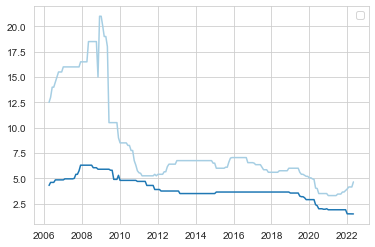

In [790]:
plt.plot(macros[['overdtryggt', 'verdtryggt']])
plt.legend()

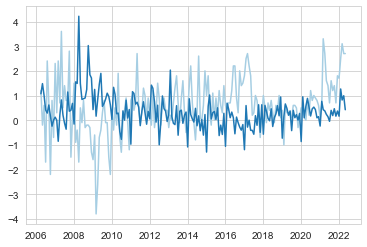

In [791]:
plt.plot(macros[['visitala_rvk_%', 'verdbolga_%']])

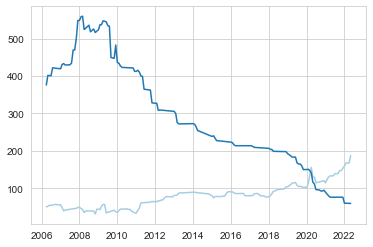

In [792]:
plt.plot(macros[['overdtryggt_vigt', 'verdtryggt_vigt']])

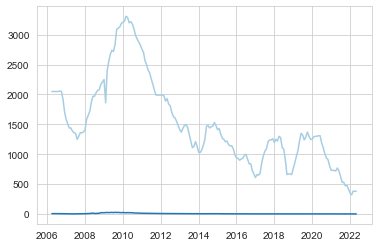

In [793]:
plt.plot(macros[['auglyst_fjolbyli', 'solutimi']])

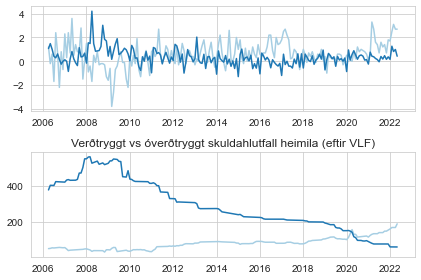

In [794]:
fig, (ax0,ax1) = plt.subplots(2,1)

ax0.plot(macros[['visitala_rvk_%', 'verdbolga_%']])
plt.title('Hækkun fateignamarkaðs vs Verðbólga án fasteignamarkaðs')

ax1.plot(macros[['overdtryggt_vigt', 'verdtryggt_vigt']])
plt.title('Verðtryggt vs óverðtryggt skuldahlutfall heimila (eftir VLF)')

plt.tight_layout()

Text(0.5, 1.0, 'Breyting á vísitölu fasteigna vs verðbólgu (án fasteigna)')

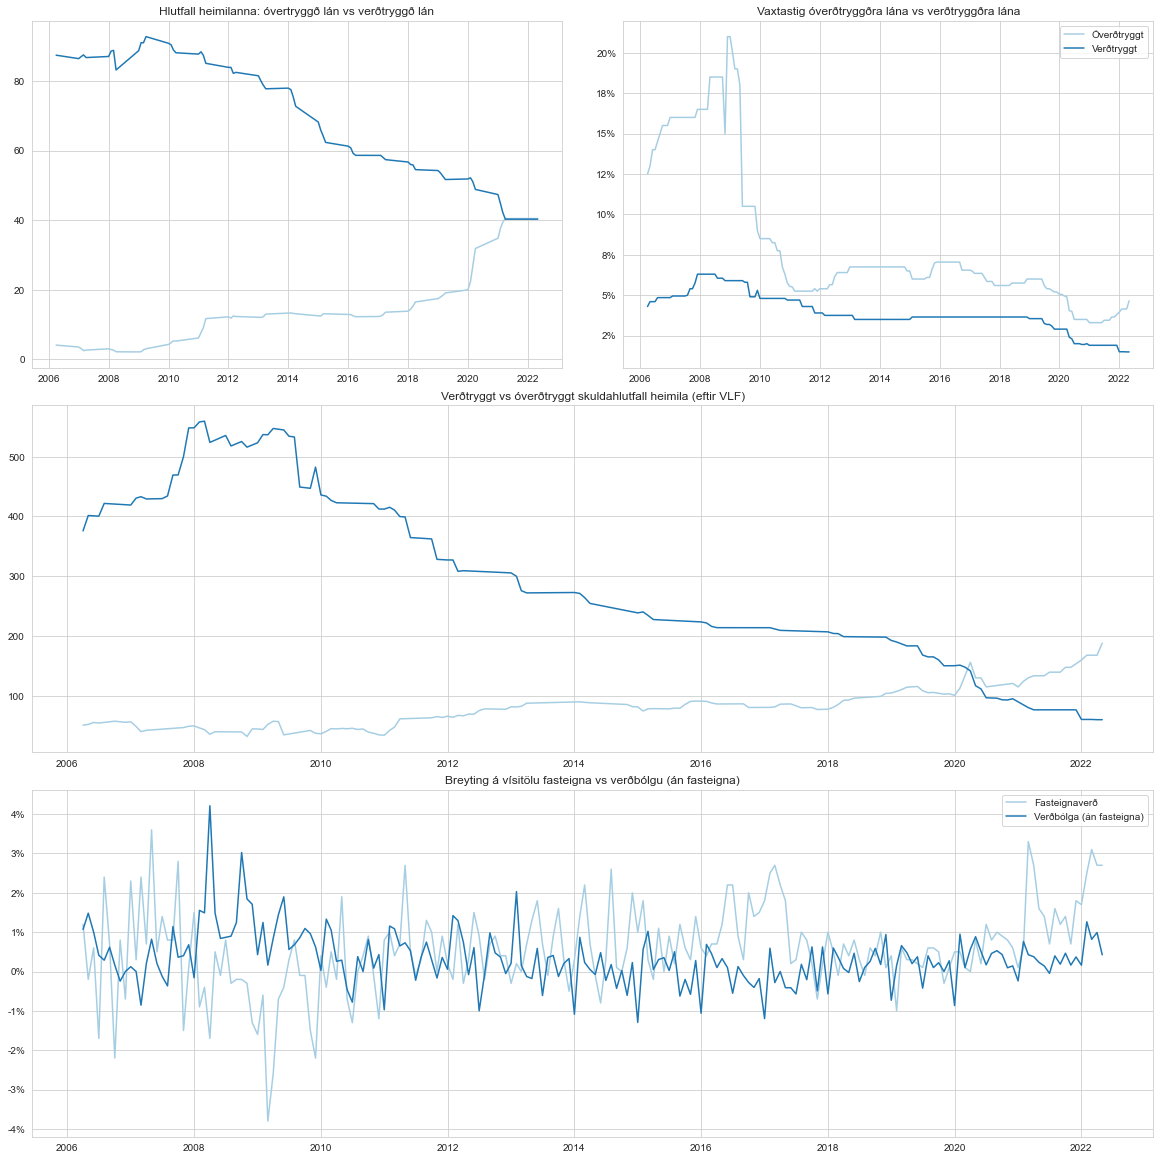

In [795]:
fig = plt.figure(constrained_layout=True, figsize=(16,16))
gs = gridspec.GridSpec(3, 2, figure=fig)
ax = fig.add_subplot(gs[0, 0])
ax.plot(macros[['Óverðtryggð lán', 'Verðtryggð lán']])
plt.title('Hlutfall heimilanna: óvertryggð lán vs verðtryggð lán')

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(macros[['overdtryggt', 'verdtryggt']], label=('Óverðtryggt', 'Verðtryggt'))
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)
ax2.legend()
plt.title('Vaxtastig óverðtryggðra lána vs verðtryggðra lána')

ax3 = fig.add_subplot(gs[1,:])
ax3.plot(macros[['overdtryggt_vigt', 'verdtryggt_vigt']])
plt.title('Verðtryggt vs óverðtryggt skuldahlutfall heimila (eftir VLF)')

ax4 = fig.add_subplot(gs[2,:])
ax4.plot(macros[['visitala_rvk_%', 'verdbolga_%']], label=('Fasteignaverð', 'Verðbólga (án fasteigna)'))
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax4.yaxis.set_major_formatter(yticks)
ax4.legend()
plt.title('Breyting á vísitölu fasteigna vs verðbólgu (án fasteigna)')

In [796]:
macros.dtypes

fjöldi_kaupsamninga    float64
auglyst_fjolbyli       float64
solutimi               float64
Verðtryggð lán         float64
erlend_lan             float64
Óverðtryggð lán        float64
overdtryggt            float64
verdtryggt             float64
visitala_rvk_%         float64
verdbolga_%            float64
verdtryggt_vigt        float64
overdtryggt_vigt       float64
dtype: object